In [27]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import math
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-03-17 08:13:59,920: Credentials are already in use. The existing account in the session will be replaced.


## Classical solution

In [28]:
angle_list = [0,np.pi/9,np.pi/6,5*np.pi/18,np.pi/3]
rotation_matrices_list = []

for theta in angle_list:
    rotation_matrices_list.append(np.array([[math.cos(theta),-math.sin(theta)],[math.sin(theta),math.cos(theta)]]))
    

In [29]:
Ainv = np.kron(np.kron(rotation_matrices_list[2],rotation_matrices_list[3]),rotation_matrices_list[4])
b = np.kron(np.kron(rotation_matrices_list[1],rotation_matrices_list[4]),rotation_matrices_list[0])
b_init = np.ones(8)/math.sqrt(8)
b = np.dot(b,b_init)

In [30]:
b

array([-0.07734451, -0.07734451,  0.28865364,  0.28865364, -0.16586584,
       -0.16586584,  0.61901973,  0.61901973])

In [31]:
A = np.transpose(Ainv)
A

array([[ 0.2783352 ,  0.48209071,  0.33170697,  0.57453333,  0.1606969 ,
         0.2783352 ,  0.19151111,  0.33170697],
       [-0.48209071,  0.2783352 , -0.57453333,  0.33170697, -0.2783352 ,
         0.1606969 , -0.33170697,  0.19151111],
       [-0.33170697, -0.57453333,  0.2783352 ,  0.48209071, -0.19151111,
        -0.33170697,  0.1606969 ,  0.2783352 ],
       [ 0.57453333, -0.33170697, -0.48209071,  0.2783352 ,  0.33170697,
        -0.19151111, -0.2783352 ,  0.1606969 ],
       [-0.1606969 , -0.2783352 , -0.19151111, -0.33170697,  0.2783352 ,
         0.48209071,  0.33170697,  0.57453333],
       [ 0.2783352 , -0.1606969 ,  0.33170697, -0.19151111, -0.48209071,
         0.2783352 , -0.57453333,  0.33170697],
       [ 0.19151111,  0.33170697, -0.1606969 , -0.2783352 , -0.33170697,
        -0.57453333,  0.2783352 ,  0.48209071],
       [-0.33170697,  0.19151111,  0.2783352 , -0.1606969 ,  0.57453333,
        -0.33170697, -0.48209071,  0.2783352 ]])

In [32]:
#Theoretical solution
x_true = np.dot(Ainv,b)
x_true

array([-0.0204441 ,  0.07629841,  0.00953324, -0.03557853,  0.23367711,
       -0.87209484, -0.10896542,  0.4066645 ])

## Quantum Implementation

In [33]:
circ = QuantumCircuit(3)
circ.h(0)
circ.i(0)
circ.u(2*np.pi/3,0,0,0)
circ.h(1)
circ.u(2*np.pi/3,0,0,1)
circ.u(5*np.pi/9,0,0,1)
circ.h(2)
circ.u(2*np.pi/9,0,0,2)
circ.u(np.pi/3,0,0,2)



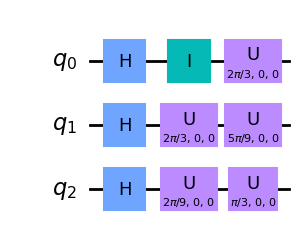

In [34]:
circ.draw('mpl')

In [35]:
from qiskit.quantum_info.operators import Operator

Operator(circ)

Operator([[-0.0204441 +0.j,  0.07629841+0.j,  0.00953324+0.j,
           -0.03557853+0.j,  0.23367711+0.j, -0.87209484+0.j,
           -0.10896542+0.j,  0.4066645 +0.j],
          [ 0.07629841+0.j,  0.0204441 +0.j, -0.03557853+0.j,
           -0.00953324+0.j, -0.87209484+0.j, -0.23367711+0.j,
            0.4066645 +0.j,  0.10896542+0.j],
          [ 0.00953324+0.j, -0.03557853+0.j,  0.0204441 +0.j,
           -0.07629841+0.j, -0.10896542+0.j,  0.4066645 +0.j,
           -0.23367711+0.j,  0.87209484+0.j],
          [-0.03557853+0.j, -0.00953324+0.j, -0.07629841+0.j,
           -0.0204441 +0.j,  0.4066645 +0.j,  0.10896542+0.j,
            0.87209484+0.j,  0.23367711+0.j],
          [ 0.23367711+0.j, -0.87209484+0.j, -0.10896542+0.j,
            0.4066645 +0.j,  0.0204441 +0.j, -0.07629841+0.j,
           -0.00953324+0.j,  0.03557853+0.j],
          [-0.87209484+0.j, -0.23367711+0.j,  0.4066645 +0.j,
            0.10896542+0.j, -0.07629841+0.j, -0.0204441 +0.j,
            0.03557853+0.j

In [36]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

Statevector([-0.02 +0.j,  0.076+0.j,  0.01 +0.j, -0.036+0.j,  0.234+0.j,
             -0.872+0.j, -0.109+0.j,  0.407+0.j],
            dims=(2, 2, 2))


In [37]:
x_est = np.array([np.real(outputstate[i]) for i in range(8)])
x_est

array([-0.02 ,  0.076,  0.01 , -0.036,  0.234, -0.872, -0.109,  0.407])

## Comparison of Solutions


In [38]:
np.linalg.norm(x_est-x_true)

0.0009532997077751288

In [39]:
for i in range(10):
    job = backend.run(circ)
    result = job.result()
    outputstate = result.get_statevector(circ, decimals=3)
    x_est = np.array([np.real(outputstate[i]) for i in range(8)])
    print("Repetition " + str(i+1) + " - Residual norm " + str(np.linalg.norm(x_est-x_true)))

Repetition 1 - Residual norm 0.0009532997077751288
Repetition 2 - Residual norm 0.0009532997077751288
Repetition 3 - Residual norm 0.0009532997077751288
Repetition 4 - Residual norm 0.0009532997077751288
Repetition 5 - Residual norm 0.0009532997077751288
Repetition 6 - Residual norm 0.0009532997077751288
Repetition 7 - Residual norm 0.0009532997077751288
Repetition 8 - Residual norm 0.0009532997077751288
Repetition 9 - Residual norm 0.0009532997077751288
Repetition 10 - Residual norm 0.0009532997077751288


## Fidelity

In [40]:
print("Fidelity: ",np.inner(x_true,x_est))

Fidelity:  1.0001205456098337


## Graphs

Text(0.5, 1.0, 'Absolute error')

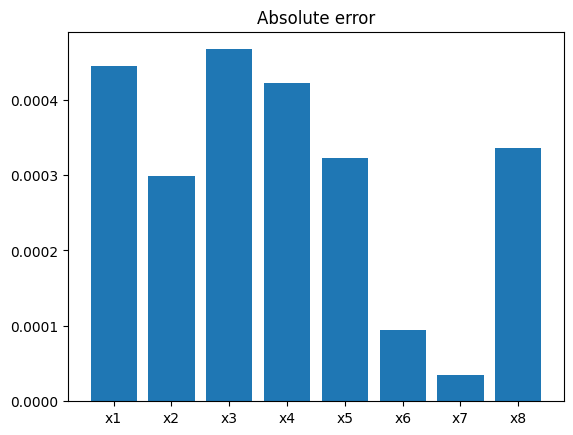

In [41]:
import matplotlib.pyplot as plt

plt.bar(["x%d"%(i+1) for i in range(8)],np.absolute(x_est-x_true))
plt.title("Absolute error")

<AxesSubplot: >

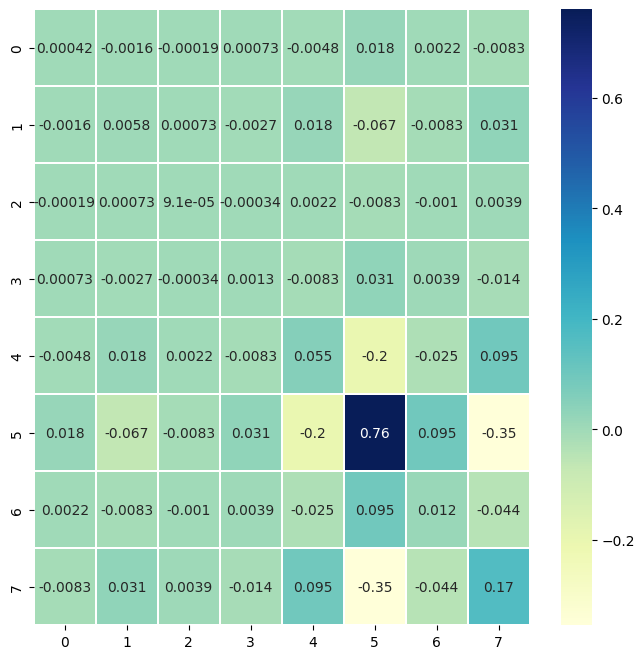

In [49]:
#density matrix of theoretical solution
import seaborn as sns

density_mtx = np.outer(x_true,x_true)
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(density_mtx, cmap="YlGnBu",annot=True, linewidths=.3, ax=ax)

<AxesSubplot: >

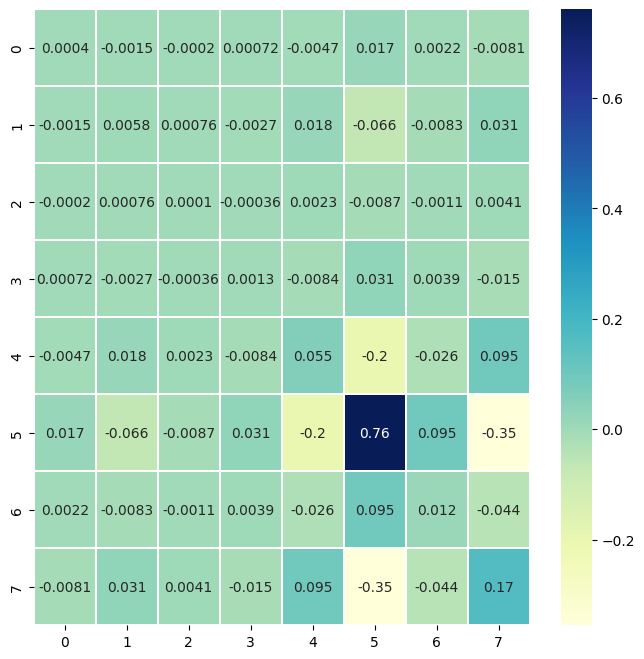

In [51]:
density_mtx_est = np.outer(x_est,x_est)
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(density_mtx_est, cmap="YlGnBu",annot=True, linewidths=.3, ax=ax)

## Linear System B in the paper

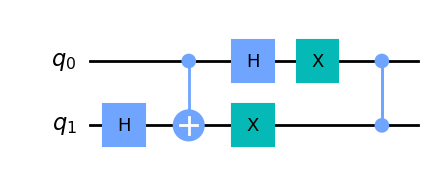

In [16]:
circb = QuantumCircuit(2)
circb.h(1)
circb.cnot(0,1)
circb.h(0)
circb.x(1)
circb.x(0)
circb.cz(0,1)
circb.draw()

In [19]:
opb = Operator(circb)
opb

Operator([[ 0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
          [-0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [26]:
np.transpose(opb.data)

array([[ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
       [-0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
       [-0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
       [-0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j]])

$$x_1+x_2+x_3-x_4=2$$
$$-x_1+x_2-x_3-x_4=0$$
$$-x_1-x_2+x_3-x_4=0$$
$$-x_1+x_2+x_3+x_4=0$$